In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\marpaka pradeep sai\\Downloads\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df1.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [6]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# There exists a Strong Positive Corrleation between Delivery Time and Sorting Time

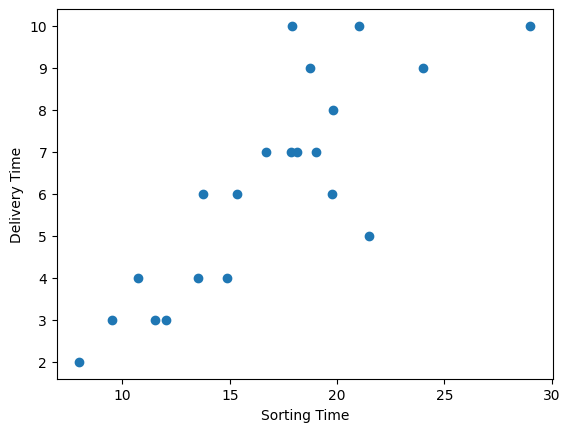

In [7]:
plt.scatter(df1['Delivery_Time'], df1['Sorting_Time'])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

# From the above scatter plot we can conclude that there exists a positive correlation between the variables "Delivery Time" and "Sorting Time".

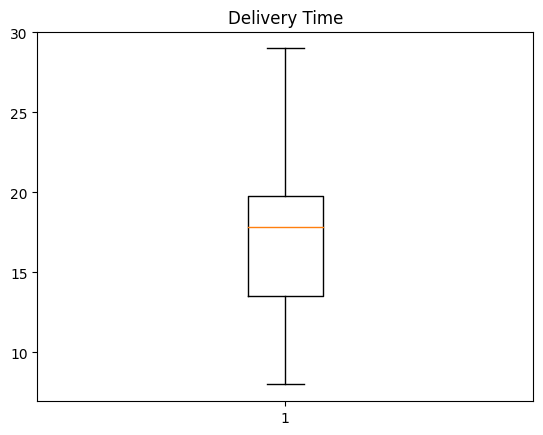

In [8]:
plt.boxplot(df1['Delivery_Time'])
plt.title("Delivery Time")
plt.show()

# The variable "Delivery Time" has no Outliers

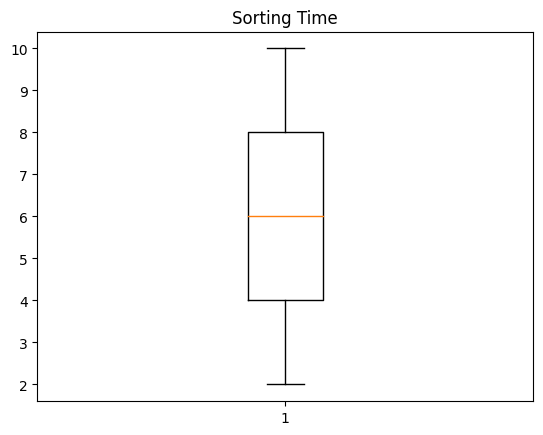

In [9]:
plt.boxplot(df1['Sorting_Time'])
plt.title("Sorting Time")
plt.show()

# The variable "Sorting Time" has no outliers

C:\Users\marpaka pradeep sai\AppData\Local\Temp\ipykernel_9528\2094726829.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Delivery_Time'], bins = 10, kde = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

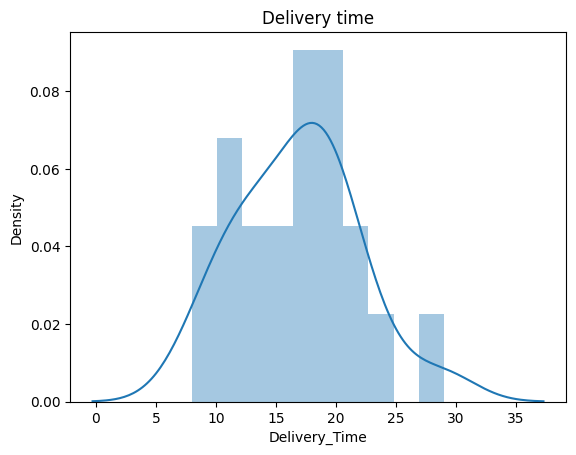

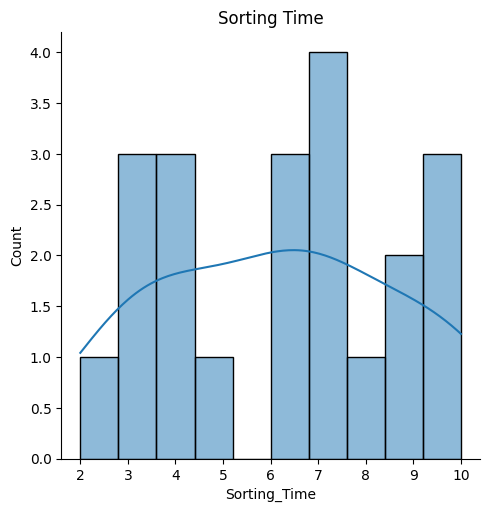

In [10]:
sns.distplot(df1['Delivery_Time'], bins = 10, kde = True)
plt.title('Delivery time')
sns.displot(df1['Sorting_Time'], bins = 10, kde = True)
plt.title('Sorting Time')
plt.show()

# Without any data transformation

In [11]:
ST = np.vstack(df1['Sorting_Time'])
ST

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]])

In [12]:
DT = np.array(df1['Delivery_Time'])
DT

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

# Fitting a Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(ST, DT)

LinearRegression()

In [14]:
# B0(intercept) + B1(coef)*X

In [15]:
LR.intercept_

6.58273397199706

In [16]:
LR.coef_

array([1.6490199])

In [17]:
DT_pred = LR.predict(ST)

In [18]:
DT_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

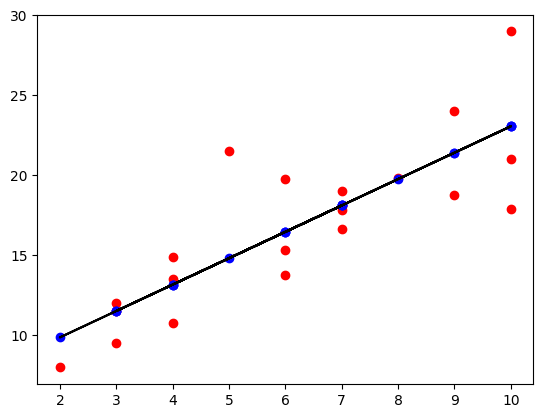

In [19]:
plt.scatter(ST,DT,color = "red")
plt.scatter(ST,DT_pred,color = "blue")
plt.plot(ST,DT_pred,color='black')
plt.show()

In [20]:
# Metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(DT,DT_pred)
print("mean squared error :", mse.round(3))
print("Root mean squared error :", np.sqrt(mse).round(3))

mean squared error : 7.793
Root mean squared error : 2.792


# Square Transformation on Sorting Time

In [21]:
ST_square = np.square(ST)
ST_square

array([[100],
       [ 16],
       [ 36],
       [ 81],
       [100],
       [ 36],
       [ 49],
       [  9],
       [100],
       [ 81],
       [ 64],
       [ 16],
       [ 49],
       [  9],
       [  9],
       [ 16],
       [ 36],
       [ 49],
       [  4],
       [ 49],
       [ 25]])

In [22]:
DT

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [23]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(ST_square,DT)

LinearRegression()

In [24]:
LR1.intercept_

11.237205188841068

In [25]:
LR1.coef_

array([0.12487012])

In [26]:
DT_pred1 = LR1.predict(ST_square)

In [27]:
DT_pred1

array([23.72421708, 13.23512709, 15.73252947, 21.35168482, 23.72421708,
       15.73252947, 17.35584101, 12.36103626, 23.72421708, 21.35168482,
       19.2288928 , 13.23512709, 17.35584101, 12.36103626, 12.36103626,
       13.23512709, 15.73252947, 17.35584101, 11.73668566, 17.35584101,
       14.35895816])

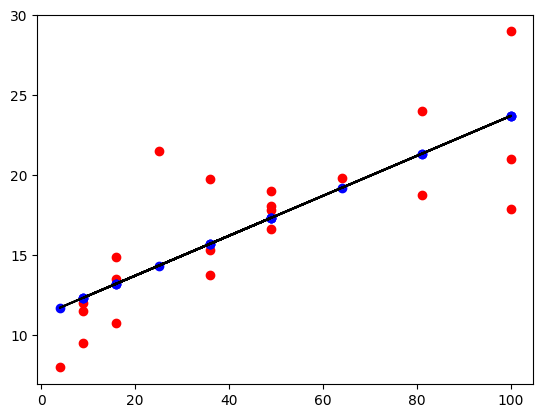

In [28]:
plt.scatter(ST_square,DT,color = "red")
plt.scatter(ST_square,DT_pred1,color = "blue")
plt.plot(ST_square,DT_pred1,color='black')
plt.show()

In [29]:
# metrics
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(DT,DT_pred1)
print("mean squared error :", mse1.round(3))
print("Root mean squared error :", np.sqrt(mse1).round(3))

mean squared error : 9.068
Root mean squared error : 3.011


# Square root transformation on Sorting Time

In [30]:
ST_sqrt = np.sqrt(ST)
ST_sqrt

array([[3.16227766],
       [2.        ],
       [2.44948974],
       [3.        ],
       [3.16227766],
       [2.44948974],
       [2.64575131],
       [1.73205081],
       [3.16227766],
       [3.        ],
       [2.82842712],
       [2.        ],
       [2.64575131],
       [1.73205081],
       [1.73205081],
       [2.        ],
       [2.44948974],
       [2.64575131],
       [1.41421356],
       [2.64575131],
       [2.23606798]])

In [31]:
DT

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [32]:
from sklearn.linear_model import LinearRegression
LR2 = LinearRegression()
LR2.fit(ST_sqrt,DT)

LinearRegression()

In [33]:
LR2.intercept_

-2.5188366158388824

In [34]:
LR2.coef_

array([7.93659075])

In [35]:
DT_pred2 = LR2.predict(ST_sqrt)
DT_pred2

array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])

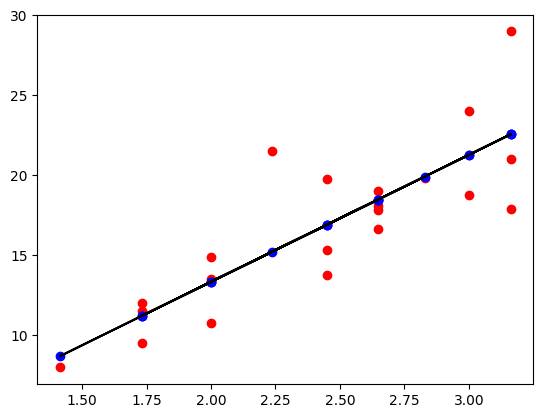

In [36]:
plt.scatter(ST_sqrt,DT,color = "red")
plt.scatter(ST_sqrt,DT_pred2,color = "blue")
plt.plot(ST_sqrt,DT_pred2,color='black')
plt.show()

In [37]:
# metrics
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(DT,DT_pred2)
print("mean squared error :", mse2.round(3))
print("Root mean squared error :", np.sqrt(mse2).round(3))

mean squared error : 7.461
Root mean squared error : 2.732


# Logarithm transformation on Sorting Time

In [38]:
ST_log = np.log(ST)
ST_log

array([[2.30258509],
       [1.38629436],
       [1.79175947],
       [2.19722458],
       [2.30258509],
       [1.79175947],
       [1.94591015],
       [1.09861229],
       [2.30258509],
       [2.19722458],
       [2.07944154],
       [1.38629436],
       [1.94591015],
       [1.09861229],
       [1.09861229],
       [1.38629436],
       [1.79175947],
       [1.94591015],
       [0.69314718],
       [1.94591015],
       [1.60943791]])

In [39]:
DT

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [40]:
from sklearn.linear_model import LinearRegression
LR3 = LinearRegression()
LR3.fit(ST_log,DT)

LinearRegression()

In [41]:
LR3.intercept_

1.1596835115465662

In [42]:
LR3.coef_

array([9.04341346])

In [43]:
DT_pred3 = LR3.predict(ST_log)
DT_pred3

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

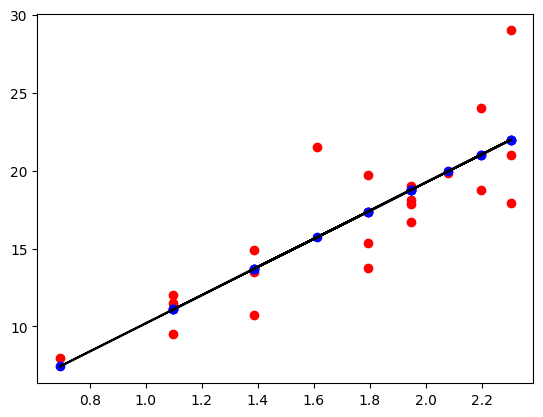

In [44]:
plt.scatter(ST_log,DT,color = "red")
plt.scatter(ST_log,DT_pred3,color = "blue")
plt.plot(ST_log,DT_pred3,color='black')
plt.show()

In [45]:
# metrics
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(DT,DT_pred3)
print("mean squared error :", mse3.round(3))
print("Root mean squared error :", np.sqrt(mse3).round(3))

mean squared error : 7.47
Root mean squared error : 2.733


# Cube transformation on Sorting Time

In [46]:
ST_cube = ST**3
ST_cube

array([[1000],
       [  64],
       [ 216],
       [ 729],
       [1000],
       [ 216],
       [ 343],
       [  27],
       [1000],
       [ 729],
       [ 512],
       [  64],
       [ 343],
       [  27],
       [  27],
       [  64],
       [ 216],
       [ 343],
       [   8],
       [ 343],
       [ 125]], dtype=int32)

In [47]:
DT

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [48]:
from sklearn.linear_model import LinearRegression
LR4 = LinearRegression()
LR4.fit(ST_cube,DT)

LinearRegression()

In [49]:
LR.intercept_

6.58273397199706

In [50]:
LR.coef_

array([1.6490199])

In [51]:
DT_pred4 = LR4.predict(ST_cube)
DT_pred4

array([24.00636983, 13.58103571, 15.27403869, 20.98792373, 24.00636983,
       15.27403869, 16.68858723, 13.16892314, 24.00636983, 20.98792373,
       18.57093922, 13.58103571, 16.68858723, 13.16892314, 13.16892314,
       13.58103571, 15.27403869, 16.68858723, 12.95729777, 16.68858723,
       14.26046454])

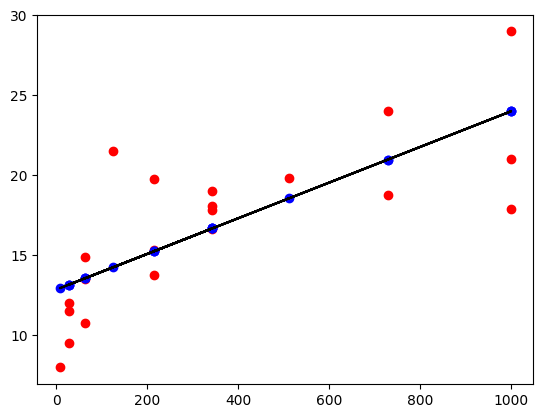

In [52]:
plt.scatter(ST_cube,DT,color = "red")
plt.scatter(ST_cube,DT_pred4,color = "blue")
plt.plot(ST_cube,DT_pred4,color='black')
plt.show()

In [53]:
# metrics
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(DT,DT_pred4)
print("mean squared error :", mse4.round(3))
print("Root mean squared error :", np.sqrt(mse4).round(3))

mean squared error : 10.581
Root mean squared error : 3.253


# 

# Cuberoot transformation on Sorting Time

In [54]:
ST_cbrt = np.cbrt(ST)
ST_cbrt

array([[2.15443469],
       [1.58740105],
       [1.81712059],
       [2.08008382],
       [2.15443469],
       [1.81712059],
       [1.91293118],
       [1.44224957],
       [2.15443469],
       [2.08008382],
       [2.        ],
       [1.58740105],
       [1.91293118],
       [1.44224957],
       [1.44224957],
       [1.58740105],
       [1.81712059],
       [1.91293118],
       [1.25992105],
       [1.91293118],
       [1.70997595]])

In [55]:
DT

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [56]:
from sklearn.linear_model import LinearRegression
LR5 = LinearRegression()
LR5.fit(ST_cbrt,DT)

LinearRegression()

In [57]:
LR5.intercept_

-11.579201382819605

In [58]:
LR5.coef_

array([15.76728359])

In [59]:
DT_pred5 = LR5.predict(ST_cbrt)
DT_pred5

array([22.39038135, 13.44980117, 17.07185432, 21.21807014, 22.39038135,
       17.07185432, 18.58252706, 11.1611566 , 22.39038135, 21.21807014,
       19.95536579, 13.44980117, 18.58252706, 11.1611566 , 11.1611566 ,
       13.44980117, 17.07185432, 18.58252706,  8.28633111, 18.58252706,
       15.3824743 ])

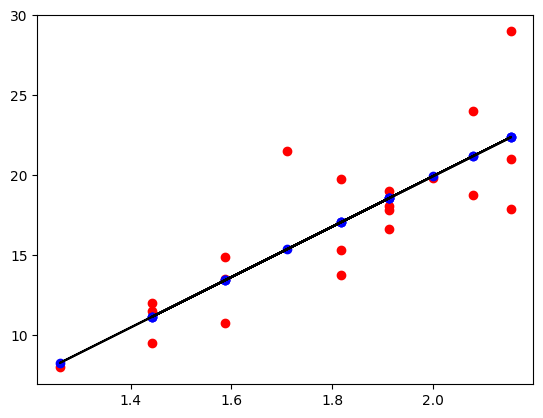

In [60]:
plt.scatter(ST_cbrt,DT,color = "red")
plt.scatter(ST_cbrt,DT_pred5,color = "blue")
plt.plot(ST_cbrt,DT_pred5,color='black')
plt.show()

In [61]:
# metrics
from sklearn.metrics import mean_squared_error
mse5 = mean_squared_error(DT,DT_pred5)
print("mean squared error :", mse5.round(3))
print("Root mean squared error :", np.sqrt(mse5).round(3))

mean squared error : 7.422
Root mean squared error : 2.724


In [62]:
RMSE = []
RMSE.append(np.sqrt(mse).round(3))
RMSE.append(np.sqrt(mse1).round(3))
RMSE.append(np.sqrt(mse2).round(3))
RMSE.append(np.sqrt(mse3).round(3))
RMSE.append(np.sqrt(mse4).round(3))
RMSE.append(np.sqrt(mse5).round(3))

In [63]:
RMSE

[2.792, 3.011, 2.732, 2.733, 3.253, 2.724]

In [64]:
data = {'Transformation' : ['No_transformation', 'Square', 'Square_root', 'Logarithm','Cube', 'Cube_root'],
       'RMSE' : RMSE}

df_RMSE = pd.DataFrame(data)
df_RMSE

,Transformation,RMSE
0,No_transformation,2.792
1,Square,3.011
2,Square_root,2.732
3,Logarithm,2.733
4,Cube,3.253
5,Cube_root,2.724


In [65]:
df_RMSE[df_RMSE['RMSE'] == df_RMSE['RMSE'].min()]

,Transformation,RMSE
5,Cube_root,2.724


# As we can see that the Cube root data transformation has the least Root Mean Squared error (RMSE) = 2.724 compared to other transformations. Hence, we are going to use cube root transformation to predict our values

# Predicted values of the cube root transformation model

In [66]:
Predicted_Delivery_time = pd.DataFrame(DT_pred5)
Predicted_Delivery_time

,0
0,22.390381
1,13.449801
2,17.071854
3,21.218070
4,22.390381
5,17.071854
6,18.582527
7,11.161157
8,22.390381
9,21.218070


In [67]:
df_new = pd.concat([df1,Predicted_Delivery_time], axis = 1)
df_new.rename(columns = {0 : "Predicted_Delivery_time"}, inplace = True)
df_new = df_new[['Sorting_Time', 'Delivery_Time', 'Predicted_Delivery_time']]
df_new

,Sorting_Time,Delivery_Time,Predicted_Delivery_time
0,10,21.00,22.390381
1,4,13.50,13.449801
2,6,19.75,17.071854
3,9,24.00,21.218070
4,10,29.00,22.390381
5,6,15.35,17.071854
6,7,19.00,18.582527
7,3,9.50,11.161157
8,10,17.90,22.390381
9,9,18.75,21.218070


# 

#  Predictions without any data transformation

In [68]:
without_transformation = pd.DataFrame(DT_pred)
df_new1 = pd.concat([df1, without_transformation], axis = 1)
df_new1.rename(columns = {0 : 'Pred_DT_without_transformation'}, inplace = True)
df_new1 = df_new1[['Sorting_Time', 'Delivery_Time', 'Pred_DT_without_transformation']]
df_new1

,Sorting_Time,Delivery_Time,Pred_DT_without_transformation
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
